In [1]:
%matplotlib inline
from typing import List, Dict

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorly as tl
from gluonts.dataset.util import to_pandas


from tens_utils import (
    get_gluonts_dataset,
    mad,
    rmse, 
    get_param_sweep,
    trend_cycle_decompose,
)

from forecaster import (
    DCTForecaster, DFTForecaster, HoltWintersForecaster, CPForecaster, TuckerForecaster, FourierBasisRegressionForecaster
)
from experiment import SingleForecasterExperiment, TensorSeasonExperiment

In [2]:
exp = TensorSeasonExperiment(
    dataset_name="traffic_75",
    folds=(24, 7),
    nr_in_cycles=70,
    nr_examples=5,
)
traffic = exp._get_dataset()

In [3]:
tg = traffic[0]['target']

In [4]:
hw = FourierBasisRegressionForecaster(folds=(24, 7), nr_params=10)

In [5]:
in_sample, fcast = hw.run_forecast(
    pd.Series(tg),
    nr_in_cycles=70,
)

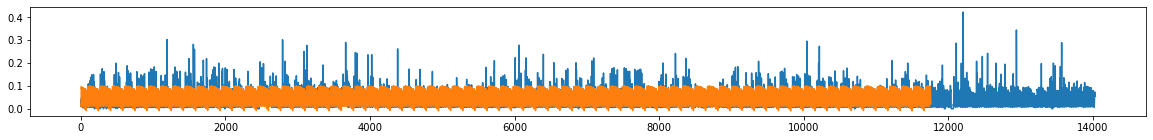

In [6]:
plt.figure(figsize=(20, 2))
plt.plot(tg)
plt.plot(in_sample)

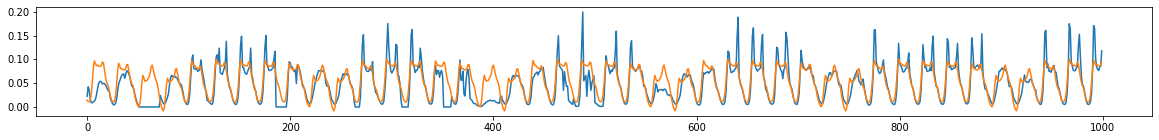

In [7]:
plt.figure(figsize=(20, 2))
plt.plot(tg[:1000])
plt.plot(in_sample[:1000])

In [11]:
rmse(in_sample, tg[:len(in_sample)])

0.008326298412073689

In [8]:
res = hw(pd.Series(tg), nr_in_cycles=70)

In [9]:
res.in_errors

[0.01613954694375906, 0.0077775863181081956]

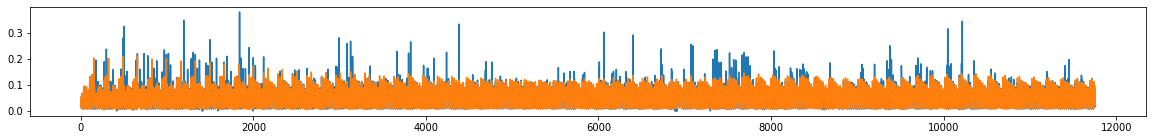

In [10]:
plt.figure(figsize=(20, 2))
plt.plot(tg[:len(res.in_sample_approx)])
plt.plot(res.in_sample_approx)

In [11]:
rmse(res.in_sample_approx, tg[:len(res.in_sample_approx)])

0.01613954694375906

In [12]:
sfexp = SingleForecasterExperiment(
    forecaster_class=HoltWintersForecaster,
    param_sweep = [1],
    folds=(24, 7),
    error_callbacks=(rmse, mad)
)

In [13]:
sfexp(pd.Series(tg), nr_in_cycles=70)

({'rmse': (0.01613954694375906,), 'mad': (0.0077775863181081956,)},
 {'rmse': (0.017619279241569696,), 'mad': (0.0074529541013603155,)},
 [168],
 [<forecaster.ForecasterResult at 0x11db2e0b8>])

In [24]:
hw = sfexp.fcaster_getter(1)

In [27]:
res = hw(pd.Series(tg), nr_in_cycles=70)
res.in_errors

[0.0, 0.0]